In [2]:
! pip install kaggle

In [3]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


Import file

In [4]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 90% 147M/163M [00:00<00:00, 463MB/s] 
100% 163M/163M [00:00<00:00, 463MB/s]


In [5]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [6]:
!ls

data		       file-20201207-23-y5xejn.avif  sample_data
face-mask-dataset.zip  kaggle.json


Importing Dependences

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [8]:
with_mask_file = os.listdir('/content/data/with_mask')
print(with_mask_file[0:5])
print(with_mask_file[-5:])

['with_mask_3093.jpg', 'with_mask_3280.jpg', 'with_mask_1277.jpg', 'with_mask_1500.jpg', 'with_mask_1502.jpg']
['with_mask_1012.jpg', 'with_mask_1873.jpg', 'with_mask_1689.jpg', 'with_mask_482.jpg', 'with_mask_2779.jpg']


In [9]:
without_mask_file = os.listdir('/content/data/without_mask')
print(without_mask_file[0:5])
print(without_mask_file[-5:])

['without_mask_2849.jpg', 'without_mask_2573.jpg', 'without_mask_1897.jpg', 'without_mask_807.jpg', 'without_mask_1734.jpg']
['without_mask_1132.jpg', 'without_mask_578.jpg', 'without_mask_920.jpg', 'without_mask_1688.jpg', 'without_mask_2337.jpg']


In [10]:
print('Number of with mask images:',len(with_mask_file))
print('Number of without mask images:',len(without_mask_file))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of Images**

with mask >> 1

without mask >> 0

In [11]:
#create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [12]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [13]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [14]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displying the Images**

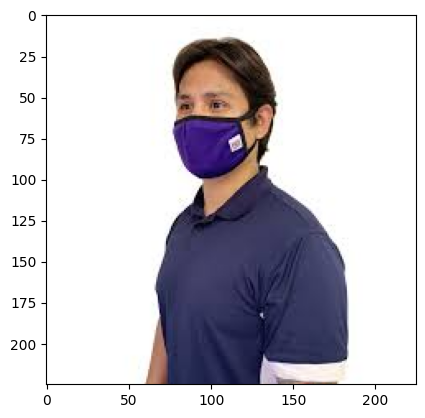

In [15]:
#displaying with mask image

img = mpimg.imread('/content/data/with_mask/with_mask_3093.jpg')
imgplot = plt.imshow(img)
plt.show()

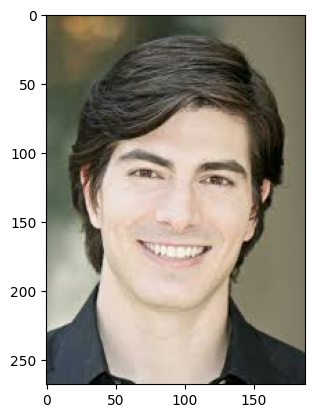

In [16]:
#displaying without mask image

img = mpimg.imread('/content/data/without_mask/without_mask_2849.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

In [17]:
#convert images to numpy arrays

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_file:
  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'

for img_file in without_mask_file:
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [18]:
type(data)

list

In [19]:
len(data)

7553

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
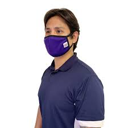

In [20]:
data[0]

In [21]:
type(data[0])

numpy.ndarray

In [22]:
data[0].shape

(128, 128, 3)

# converting image list and label list to numpy arrays

In [23]:
X = np.array(data)
Y = np.array(labels)

In [24]:
type(X)

numpy.ndarray

In [25]:
type(Y)

numpy.ndarray

In [26]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [27]:
print(Y)

[1 1 1 ... 0 0 0]


Train Test Split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [29]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [30]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[109, 107, 118],
        [114, 113, 121],
        [111, 106, 116],
        ...,
        [ 90,  97, 107],
        [ 88,  95, 105],
        [ 93,  97, 108]],

       [[110, 108, 118],
        [111, 108, 117],
        [110, 105, 113],
        ...,
        [ 87,  93, 103],
        [ 87,  93, 103],
        [ 89,  93, 104]],

       [[112, 107, 117],
        [113, 109, 117],
        [123, 117, 125],
        ...,
        [ 90,  94, 105],
        [ 92,  95, 106],
        [ 87,  91, 102]],

       ...,

       [[ 46,  66,  91],
        [ 45,  65,  90],
        [ 47,  67,  92],
        ...,
        [176, 143, 123],
        [176, 144, 123],
        [176, 145, 124]],

       [[ 49,  69,  93],
        [ 47,  67,  91],
        [ 46,  66,  90],
        ...,
        [179, 147, 126],
        [178, 146, 125],
        [177, 146, 125]],

       [[ 43,  63,  87],
        [ 43,  63,  87],
        [ 44,  64,  88],
        ...,
        [179, 147, 126],
        [177, 145, 124],
        [175, 144, 124]]], dtype=uint8)
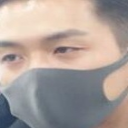

In [31]:
X_train[0]

In [32]:
X_train_scaled[0]

array([[[0.42745098, 0.41960784, 0.4627451 ],
        [0.44705882, 0.44313725, 0.4745098 ],
        [0.43529412, 0.41568627, 0.45490196],
        ...,
        [0.35294118, 0.38039216, 0.41960784],
        [0.34509804, 0.37254902, 0.41176471],
        [0.36470588, 0.38039216, 0.42352941]],

       [[0.43137255, 0.42352941, 0.4627451 ],
        [0.43529412, 0.42352941, 0.45882353],
        [0.43137255, 0.41176471, 0.44313725],
        ...,
        [0.34117647, 0.36470588, 0.40392157],
        [0.34117647, 0.36470588, 0.40392157],
        [0.34901961, 0.36470588, 0.40784314]],

       [[0.43921569, 0.41960784, 0.45882353],
        [0.44313725, 0.42745098, 0.45882353],
        [0.48235294, 0.45882353, 0.49019608],
        ...,
        [0.35294118, 0.36862745, 0.41176471],
        [0.36078431, 0.37254902, 0.41568627],
        [0.34117647, 0.35686275, 0.4       ]],

       ...,

       [[0.18039216, 0.25882353, 0.35686275],
        [0.17647059, 0.25490196, 0.35294118],
        [0.18431373, 0

# Building a CNN

In [33]:
import tensorflow as ts
from tensorflow import keras

In [34]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size =(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size =(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
# compile the neural network

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [36]:
# training the neural network
history = model.fit(X_train_scaled, y_train, validation_split=0.1, epochs=5, verbose=1)


Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 14s 42ms/step - acc: 0.6862 - loss: 0.6630 - val_acc: 0.8893 - val_loss: 0.2657
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.8903 - loss: 0.2973 - val_acc: 0.8678 - val_loss: 0.2748
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - acc: 0.8995 - loss: 0.2480 - val_acc: 0.9058 - val_loss: 0.2677
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.9260 - loss: 0.2009 - val_acc: 0.9140 - val_loss: 0.2410
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - acc: 0.9478 - loss: 0.1456 - val_acc: 0.8959 - val_loss: 0.2465


Model Evalution

In [37]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - acc: 0.9269 - loss: 0.2124
Test Accuracy = 0.9265387058258057


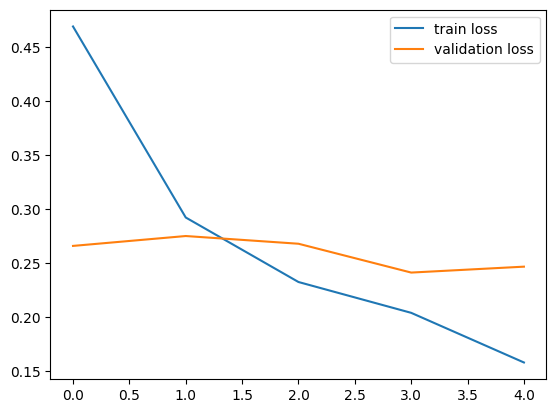

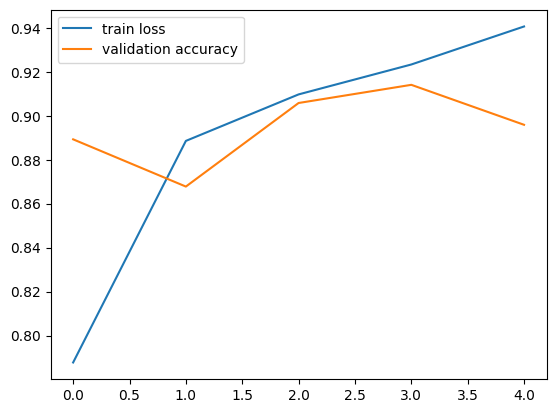

In [38]:
h = history

#plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()


#plot the accuracy value
plt.plot(h.history['acc'], label='train loss')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Predictive System

Path of the image to be predictive: /content/p08c7jft.jpg


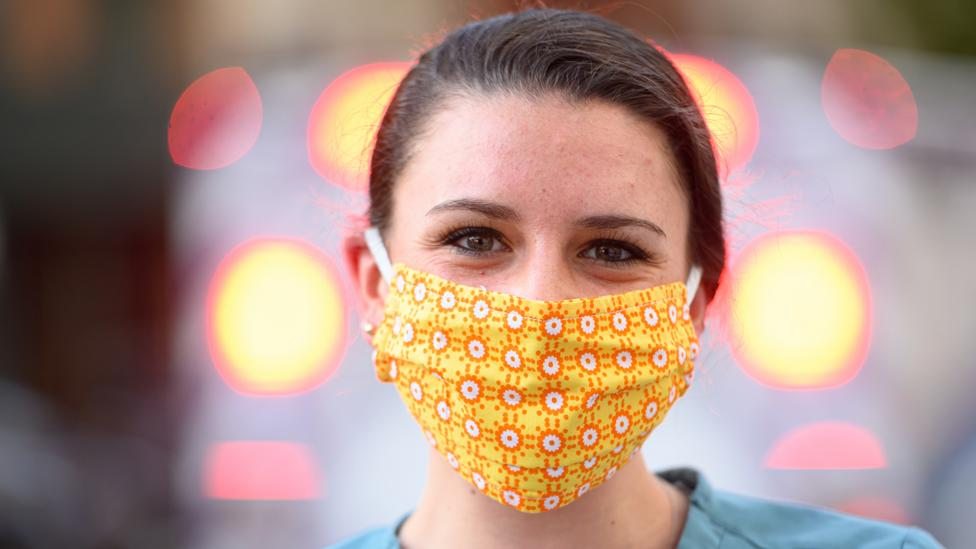

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
[[0.021162   0.86970615]]
1
The person in the image is wearing mask


In [43]:
input_image_path = input('Path of the image to be predictive: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resize/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

if input_pred_label == 1:
  print('The person in the image is wearing mask')
else:
  print('The person in the image is not wearing mask')